# Dataset visualisation and  cleaning

<div class="alert alert-block alert-success">
<b> Data cleaning </b> can be a tedious task. 
According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data. ok.
</div>

## Dataset description and visualisation

<div class="alert alert-block alert-success">
Data visualization is an essential aspect of data analysis that focuses on visually representing data. It provides a visual summary that aids in
processing and understanding information through images, maps, and graphs, simplifying observation, analysis, and comprehension. This is
particularly beneficial for large datasets, where manual processing can be tedious. Moreover, it helps highlight trends, patterns, and outliers.
Python offers a variety of libraries for data visualization, including Plotly, Matplotlib, and Seaborn.
</div>

<div class="alert alert-block alert-warning">Hepatitis is an inflammation of the liver. Most hepatitis patients are often asymptomatic. The Hepatitis dataset contains records of hepatitis cases in individuals and predicts patient survivability. For more details on this dataset, visit: https://archive.ics.
uci.edu/dataset/46/hepatitis <div>

<div class="alert alert-block alert-danger">
    
1. Import the Hepatitis dataset 
2. Print the first 10 samples
3. Print 3 random samples
4. Print the last 5 samples
5. Display the following information about the dataset: columns, number of missing values in each column, and the type of features, all in one instruction.
5. Display only the columns and their types (whether they are numerical or categorical).
6. Display the number of samples and features.
7. Display statistics for all numerical features: count, mean, standard deviation, quantiles, minimum, and maximum values.
8. Verify if the dataset is balanced using a count and a plot.
9. Using the pandas library, perform a line plot, histogram, and box plot for continuous values only. In the line plot, why is the line graph of the
feature ”protime” not continuous?
<\div>

<b>A standard deviation (or σ) </b> is a measure of how dispersed the data is in relation to the mean.

<b> The median </b> is the middle value in a list ordered from smallest to largest.

<b> 25%, 50%, and 75% </b> present the Q1, Median, and Q3 values. 
![title](fig1.png)

## Dataset cleaning

<div class="alert alert-block alert-success">
Data cleaning is a crucial step in the machine learning process for optimal algorithm performance. It involves identifying and correcting issues such as missing values, duplicates, and irrelevant data to ensure accurate, consistent, high-quality, and error-free datasets. Common techniques used in data cleaning include handling missing values, removing duplicates, data type conversion, and outlier detection.
</div>

### Missing values

<div class="alert alert-block alert-success">
Handling missing data is a critical aspect of data preprocessing in machine learning. Effective strategies include imputing missing values
using statistical methods, removing records with missing values, or employing advanced imputation techniques. Each approach has its advantages and limitations, and choosing the right method is essential
for preventing biases and maintaining the integrity of analyses.
</div>

<div class="alert alert-block alert-danger"> 
    
1. Why is data missing? 
2. Print all samples that contain missing values.
3. Print features that contain missing values.
5. Print samples with features that contain missing values.
6. Identify the number of missing values in each feature.
7. Create a new dataframe from the first one and drop samples containing
missing values.
8. Create a new dataframe from the first one and delete columns contain-ing missing values. Is deleting missing values a solution?
9. Replace missing values using the mean (for continuous values) or mode (for categorical values) and print the number of missing values after imputation.
<div/>

### Outliers

<div class="alert alert-block alert-success">
Outliers are data points that significantly deviate from the norm and can arise from various causes, including errors, anomalies, or data variability. Their presence can negatively impact the performance of machine learning models, making it essential to manage outliers for obtaining accurate results. To address outliers, it is important to identify and manage them effectively by either deciding whether to remove them or transforming them to minimize their impact on analysis.
<div/>

<div class="alert alert-block alert-danger">

1. Find outliers in the data using box plots and the Interquar-
tile Range.
2. Compute the Interquartile Range (IQR), upper and lower bounds for
both the alkaline phosphate and bilirubin features, and detect outliers.
3. Handle outliers using an automatic method (not mean or median).
<div/>

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('hepatitis.csv')

#### 1. Find outliers in the data using box plots


<Axes: >

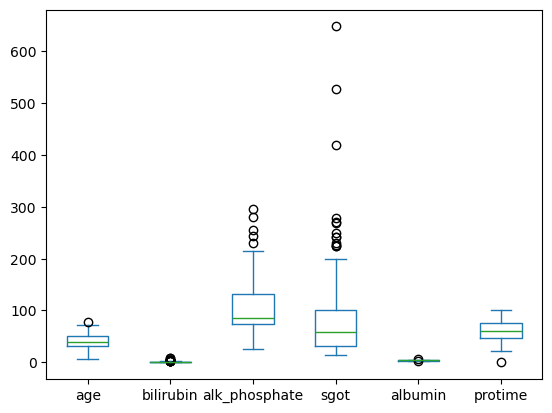

In [2]:
import matplotlib.pyplot as plt
df.plot(kind ="box")

Detecting Outliers Using Z-Score : 

**Z-Score Formula:**

$$
Z = \frac{(X - \mu)}{\sigma}
$$

Where:
- $Z$ is the Z-score,
- $X$ is the data point,
- $\mu$ is the mean of the dataset,
- $\sigma$ is the standard deviation of the dataset.


In [3]:
from scipy import stats

# Create a DataFrame to store the Z-scores
z_scores = pd.DataFrame()

# Calculate Z-scores for each numerical column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    z_scores[column] = stats.zscore(df[column])

# Define the threshold (commonly |Z| > 3 is considered an outlier)
threshold = 3

# Find outliers
outliers = (z_scores.abs() > threshold).any(axis=1)

# Display rows that are considered outliers
outlier_rows = df[outliers]
print(outlier_rows)


Empty DataFrame
Columns: [age, sex, steroid, antivirals, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable, spiders, ascites, varices, bilirubin, alk_phosphate, sgot, albumin, protime, histology, class]
Index: []


#### 2. Compute the Interquartile Range (IQR), upper and lower bounds for both the alkaline phosphate and bilirubin features, and detect outliers.


**Interquartile Range (IQR), upper bound, and lower bound**
1. Calculate the first quartile (Q1), which is the 25th percentile.
2. Calculate the third quartile (Q3), which is the 75th percentile.
3. Compute the IQR as:
 $$
 IQR = Q3 - Q1
 $$
4. Determine the lower bound and upper bound using:
$$
Lower Bound=Q1−1.5×IQR
$$
$$Upper Bound=Q3+1.5×IQR$$

In [4]:
def compute_iqr_outliers(df, column):
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
    
  # Calculate IQR
  IQR = Q3 - Q1
    
  # Calculate lower bound and upper bound
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
  print(f"\nFor column: {column}")
  print(f"Q1 (25th percentile): {Q1}")
  print(f"Q3 (75th percentile): {Q3}")
  print(f"IQR: {IQR}")
  print(f"Lower bound: {lower_bound}")
  print(f"Upper bound: {upper_bound}")
  print(f"Number of outliers: {outliers.shape[0]}")
  print(f"Outliers:\n{outliers[[column]]}")
    
  return lower_bound, upper_bound, outliers

for column in df.select_dtypes(include=['float64', 'int64']).columns:
  lower_bound, upper_bound, outliers = compute_iqr_outliers(df, column)


For column: age
Q1 (25th percentile): 32.0
Q3 (75th percentile): 50.0
IQR: 18.0
Lower bound: 5.0
Upper bound: 77.0
Number of outliers: 1
Outliers:
   age
2   78

For column: bilirubin
Q1 (25th percentile): 0.7
Q3 (75th percentile): 1.5
IQR: 0.8
Lower bound: -0.5000000000000002
Upper bound: 2.7
Number of outliers: 17
Outliers:
     bilirubin
41         4.6
62         3.5
67         4.1
71         2.8
91         4.6
97         3.0
100        4.8
103        4.6
115        3.2
119        3.2
120        2.9
127        2.8
129        4.6
131        8.0
141        3.9
146        4.2
150        7.6

For column: alk_phosphate
Q1 (25th percentile): 74.25
Q3 (75th percentile): 132.25
IQR: 58.0
Lower bound: -12.75
Upper bound: 219.25
Number of outliers: 5
Outliers:
     alk_phosphate
30           280.0
90           230.0
110          256.0
134          243.0
140          295.0

For column: sgot
Q1 (25th percentile): 31.5
Q3 (75th percentile): 100.5
IQR: 69.0
Lower bound: -72.0
Upper bound: 204.0


#### 3. Handle outliers using an automatic method (not mean or median).

When dealing with outliers (for example, using the IQR method), you can use <code>clip()</code> to limit the values in a column to the lower bound and upper bound calculated using IQR. This way, extreme outliers will be "clipped" to these boundary values, preventing them from affecting the model training.
Where:
*  <code>lower</code>: The minimum value. Any values below this will be replaced with lower.
* <code>upper</code>: The maximum value. Any values above this will be replaced with upper.

**Explanation:**
* Values below the lower bound are clipped to the lower bound.
* Values above the upper bound are clipped to upper bound.
* Values within the bounds or <code>NAN</code> remain unchanged. 

In [26]:
new_df = pd.DataFrame()

for column in df.select_dtypes(include=['float64', 'int64']).columns:
  new_df[f"{column}-clipped"] = df[column].clip(lower=lower_bound, upper=upper_bound)
print(new_df)

     age-clipped  bilirubin-clipped  alk_phosphate-clipped  sgot-clipped  \
0             30                1.0                 85.000        18.000   
1             50                0.9                121.625        42.000   
2             78                0.7                 96.000        32.000   
3             31                0.7                 46.000        52.000   
4             34                1.0                    NaN       121.625   
..           ...                ...                    ...           ...   
150           46                7.6                    NaN       121.625   
151           44                0.9                121.625       121.625   
152           61                0.8                 75.000        20.000   
153           53                1.5                 81.000        19.000   
154           43                1.2                100.000        19.000   

     albumin-clipped  protime-clipped  class-clipped  age-clipped-clipped  \
0         

##### Other Approach

##### Approach 1: Isolation Forest for Outlier Detection
The **Isolation Forest algorithm** isolates observations by randomly selecting a feature and then randomly selecting a split value between the feature’s maximum and minimum values. The fewer steps required to isolate a data point, the more likely it is an outlier.

* <code>IsolationForest</code>: We set <code>contamination=0.05</code>, meaning that we assume 5% of the data points are outliers.
* Outliers are detected by fitting the model and predicting values. A prediction of <code>-1</code> means the data point is considered an outlier, and <code>1</code> means it's an inlier.
* Handling outliers: You can either analyze the outliers separately or remove them from the dataset.

In [5]:
from sklearn.ensemble import IsolationForest

columns_of_interest = df.select_dtypes(include=['float64', 'int64']).columns
df_subset = df[columns_of_interest].dropna()  # Dropping missing values for simplicity 

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(df_subset)

df_subset['outlier'] = outlier_pred

outliers = df_subset[df_subset['outlier'] == -1]
inliers = df_subset[df_subset['outlier'] == 1]
print("Detected Outliers:")
print(outliers)

Detected Outliers:
     age  bilirubin  alk_phosphate   sgot  albumin  protime  outlier
13    30        2.2           57.0  144.0      4.9     78.0       -1
47    28        1.8          191.0  420.0      3.3     46.0       -1
100   48        4.8          123.0  157.0      2.7     31.0       -1
103   51        4.6          215.0  269.0      3.9     51.0       -1
147   70        1.7          109.0  528.0      2.8     35.0       -1


##### Approach 2: Local Outlier Factor (LOF) for Outlier Detection
The **Local Outlier Factor (LOF)** is another unsupervised machine learning method that detects the density of the data points. It compares the local density of a point to its neighbors, and a point is considered an outlier if it has a much lower density.

* <code>LocalOutlierFactor</code>: The <code>n_neighbors</code> parameter determines how many neighbors to consider while
 evaluating the density of each point. The <code>contamination</code> parameter sets the expected proportion of outliers.
* LOF predictions: The model predicts <code>-1</code> for outliers and <code>1</code> for inliers. You can then remove or handle the outliers accordingly.

In [6]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_pred_lof = lof.fit_predict(df_subset[columns_of_interest])

df_subset['outlier_lof'] = outlier_pred_lof

outliers_lof = df_subset[df_subset['outlier_lof'] == -1]
inliers_lof = df_subset[df_subset['outlier_lof'] == 1]

print("Detected Outliers using LOF:")
print(outliers_lof)

Detected Outliers using LOF:
     age  bilirubin  alk_phosphate   sgot  albumin  protime  outlier  \
11    32        1.0           59.0  249.0      3.7     54.0        1   
47    28        1.8          191.0  420.0      3.3     46.0       -1   
103   51        4.6          215.0  269.0      3.9     51.0       -1   
134   38        0.4          243.0   49.0      3.8     90.0        1   
147   70        1.7          109.0  528.0      2.8     35.0       -1   

     outlier_lof  
11            -1  
47            -1  
103           -1  
134           -1  
147           -1  


## Study of correlation and feature selection

<div class="alert alert-block alert-success">
Feature selection is a crucial process in machine learning that involves
automatically identifying the most relevant features in a dataset that
contribute to the decision-making process. Including irrelevant and
highly correlated features can lead to decreased accuracy. This process
also helps to manage high-dimensional data by reducing overfitting,
enhancing model accuracy, and decreasing training time.
<div/>

$$
r =\frac{\sum\limits_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}
            {\sqrt{\sum\limits_{i=1}^n (x_i-\bar{x})^2 \sum\limits_{i=1}^n (y_i-\bar{y})^2}}
$$

<div class="alert alert-block alert-danger"> 

1. Drop the feature ”Sex”.
2. Plot the Pearson correlation heatmap to observe the correlation of in-
dependent variables with the output variable.
3. Only select features that have an absolute correlation above 0.5 with
the output variable.
4. Drop the features that are highly correlated with malaise.
5. Should features be correlated?
<div/>

### 1. Drop the feature ”Sex”.

In [7]:
df = df.drop('sex', axis=1)

In [8]:
df.dtypes

age                  int64
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [9]:
df = df.replace({'True': True, 'False': False})
df['class'] = df['class'].replace({'live': 1, 'die': 0})


df.head

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14756\452235324.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'live': 1, 'die': 0})


<bound method NDFrame.head of      age steroid  antivirals fatigue malaise anorexia liver_big liver_firm  \
0     30   False       False   False   False    False     False      False   
1     50   False       False    True   False    False     False      False   
2     78    True       False    True   False    False      True      False   
3     31     NaN        True   False   False    False      True      False   
4     34    True       False   False   False    False      True      False   
..   ...     ...         ...     ...     ...      ...       ...        ...   
150   46    True       False    True    True     True      True      False   
151   44    True       False    True   False    False      True       True   
152   61   False       False    True    True    False     False       True   
153   53   False       False    True   False    False      True      False   
154   43    True       False    True   False    False      True      False   

    spleen_palpable spiders ascit

### 2. Plot the Pearson correlation heatmap to observe the correlation of in-dependent variables with the output variable.


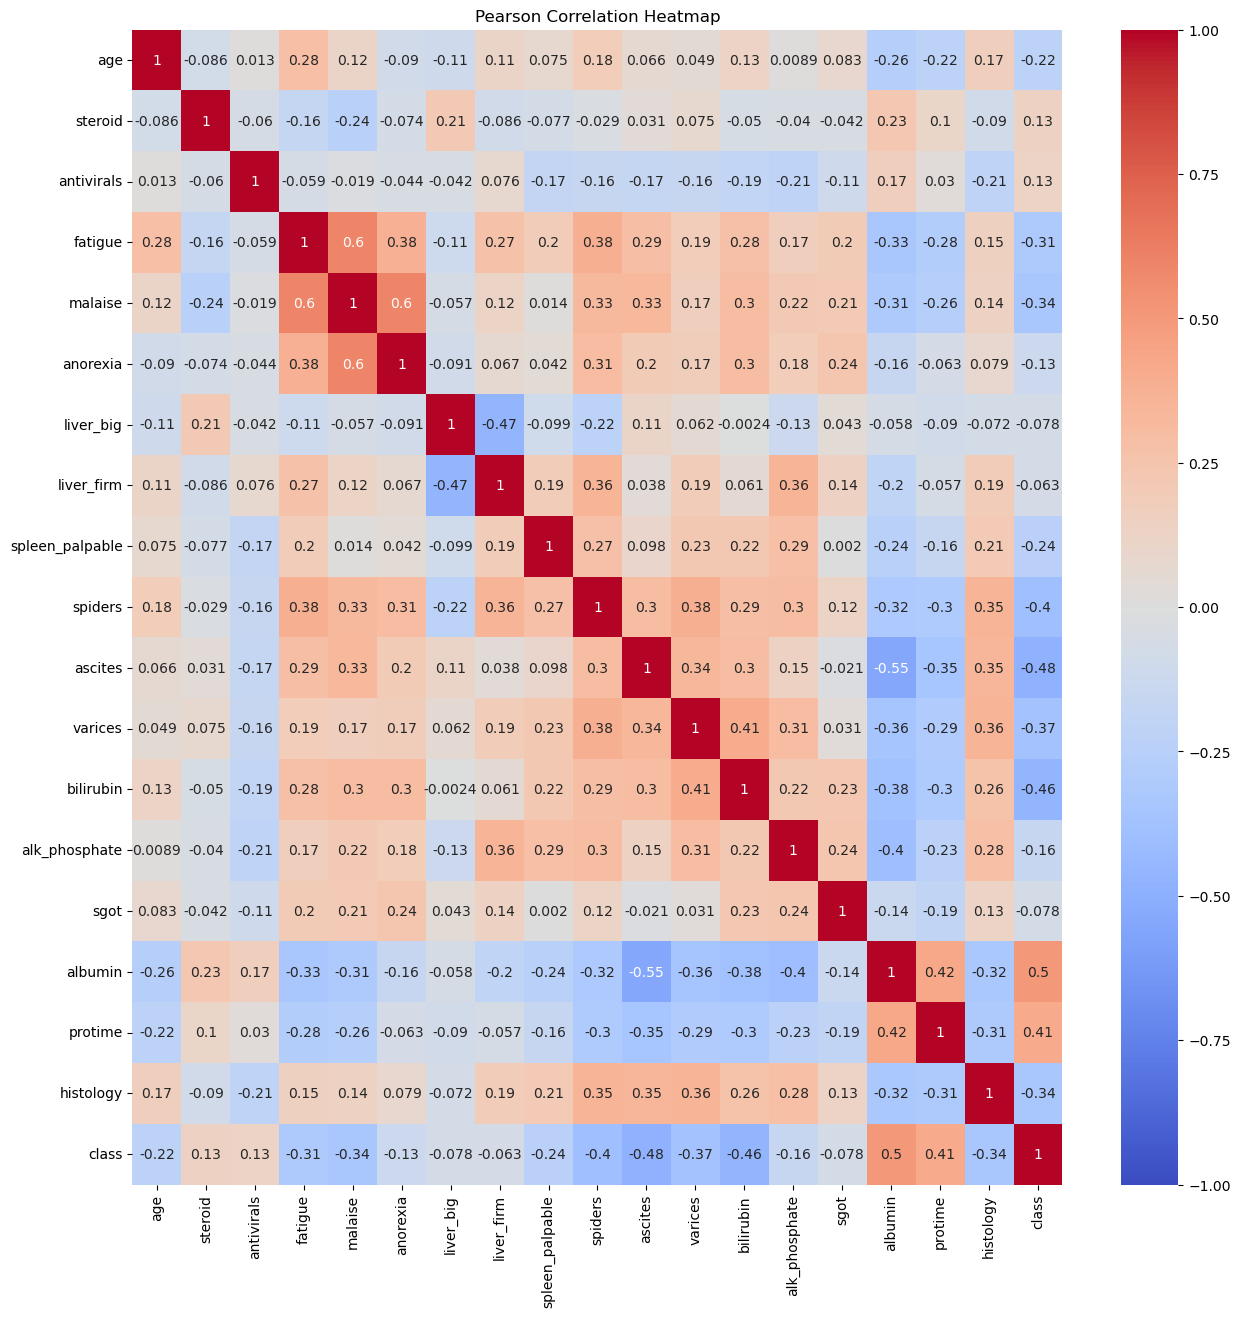

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

### 3. Only select features that have an absolute correlation above 0.5 with the output variable.


In [11]:
corr_with_target = corr_matrix['class'].abs()
selected_features = corr_with_target[corr_with_target > 0.5].index.tolist()
selected_features.remove('class')


print("Selected features based on absolute correlation above 0.5 with the output:")
print(selected_features)

Selected features based on absolute correlation above 0.5 with the output:
['albumin']


### 4. Drop the features that are highly correlated with malaise.


In [12]:
corr_with_malaise = corr_matrix['malaise']
high_corr = 0.8
high_corr_features = corr_with_malaise[abs(corr_with_malaise) > high_corr].index.tolist()
high_corr_features

['malaise']

### 5. Should features be correlated?

## Data splitting

<div class="alert alert-block alert-success">
Data splitting is the process of dividing a dataset into two or more subsets, typically comprising a training set and a testing set. This ensures that models are trained on one subset of the data (training set) while being evaluated on another (test set), which helps effectively assess their performance and improve generalization. In Python, the scikit-learn library is a popular choice for implementing data splitting, offering various functions and classes to facilitate this essential process.
<div/>

<div class="alert alert-block alert-danger">

1. Split the data into training and test sets using the hold-out and strat-
ified hold-out strategies.
2. Display the number of samples in each class for both strategies in the
training and test sets.
<div/>

### 1. Split the data into training and test sets using the hold-out and stratified hold-out strategies.


In [13]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)

[[44 True False ... 4.3 nan True]
 [56 False False ... 3.0 nan False]
 [26 False False ... 3.8 60.0 False]
 ...
 [51 True False ... 4.4 nan False]
 [36 False False ... 2.7 nan True]
 [20 False False ... 3.9 nan False]]


In [14]:
print(X_test)

[[50 True False False False False True False False False False False 1.0
  139.0 81.0 3.9 62.0 True]
 [32 False True True True False True False False False False False 1.0
  55.0 45.0 4.1 56.0 False]
 [39 True False False False False True False False False False False 1.0
  85.0 20.0 4.0 nan False]
 [62 False False True True False nan nan False False False False 1.0 nan
  60.0 nan nan False]
 [37 True False True False False True False False True False False 0.6
  67.0 28.0 4.2 nan False]
 [52 False True False False False True False False False False False 0.7
  75.0 55.0 4.0 21.0 False]
 [47 False True False False False True False False False False False nan
  nan 60.0 nan nan False]
 [33 False False True True False True False False False True False 0.7
  63.0 80.0 3.0 31.0 True]
 [40 True True True False False True True True False False False 1.2 85.0
  31.0 4.0 100.0 False]
 [31 False False True False False True False False False False False 1.2
  75.0 173.0 4.2 54.0 True]
 [36 True 

In [15]:
print(y_train)

[1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 1 1]


In [16]:
print(y_test)

[1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1]


### 2. Display the number of samples in each class for both strategies in the training and test sets.

In [24]:
print(type(y_test))
print(np.bincount(y_test))


<class 'numpy.ndarray'>
[ 5 26]


In [19]:
y_train = pd.Series(y_train)
print(y_train.value_counts())

1    97
0    27
Name: count, dtype: int64
